___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course.

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

The last step in customer segmentation is to group the customers into distinct clusters based on their characteristics and behaviors. One of the most common methods for clustering is ***K-Means Clustering***, which partitions the data into k clusters based on the distance to the cluster centroids. Other clustering methods include ***hierarchical clustering***, density-based clustering, and spectral clustering. Each cluster can be assigned a label that describes its main features and preferences.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study####

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters*

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given.

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load Dataset

In [3]:
df = pd.read_csv('Mall_Customers.csv')

#### Explore Data

You can rename columns to more usable, if you need.

In [4]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.shape

(200, 5)

In [7]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [32]:
df.rename(columns={'Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'},inplace=True)

---
---

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

## 3. Cluster Analysis

The purpose of the project is to perform cluster analysis using [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) and [Hierarchical Clustering](https://medium.com/analytics-vidhya/hierarchical-clustering-d2d92835280c) algorithms.
Using a maximum of two variables for each analysis can help to identify cluster labels more clearly.
The K-Means algorithm requires determining the number of clusters using the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering), while Hierarchical Clustering builds a dendrogram without defining the number of clusters beforehand. Different labeling should be done based on the information obtained from each analysis.
Labeling example:

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [35]:
df.head(1)

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,1,19,15,39


In [37]:
Age_s = df[['Age' , 'Spending_Score']]

In [26]:
Age_s

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


#### *ii. Determine optimal number of clusters*

<Axes: xlabel='Age', ylabel='Spending_Score'>

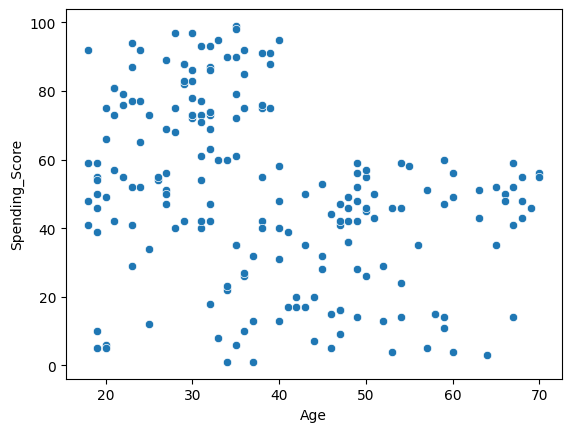

In [38]:
sns.scatterplot(x = 'Age' , y= 'Spending_Score', data= Age_s)

In [39]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(Age_s)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

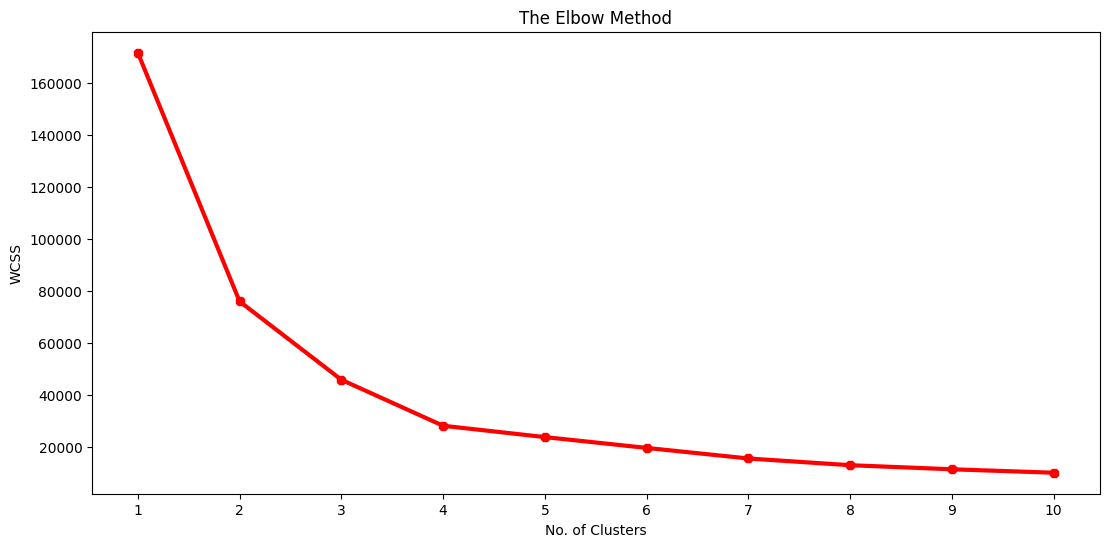

In [40]:
#plot the results for elbow method
plt.figure(figsize=(13,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11), wcss,linewidth=3, color='red', marker='8')
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,11,1))
plt.show()

### Why silhouette_score is negative?

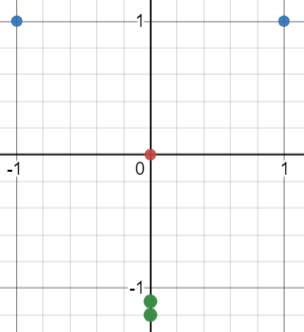

silhouette_score = (b-a)/max(a,b)

b : the mean nearest-cluster distance
a : the mean intra-cluster distance

for red point,

b = 1
a = ((1+1)**0.5 + (1+1)**0.5)/2  ==> 1.41

silhouette_score = (1-1.41)/1.41 ==> -0.29

#### *iii. Apply K Means*

In [41]:
from sklearn.cluster import KMeans

In [42]:
Kmean= KMeans(n_clusters=5)
Kmean.fit(Age_s)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [43]:
y=Kmean.predict(Age_s)
Age_s['Label']=y
Age_s.head()

<ipython-input-43-e1d23529bba8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Age_s['Label']=y


,Age,Spending_Score,Label
0,19,39,3
1,21,81,0
2,20,6,2
3,23,77,0
4,31,40,3


In [44]:
Kmean.labels_

array([3, 0, 2, 0, 3, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 4, 3, 4, 0, 4, 0,
       2, 0, 2, 0, 4, 3, 4, 0, 2, 0, 2, 0, 2, 0, 2, 0, 4, 0, 1, 0, 4, 3,
       4, 3, 1, 3, 3, 3, 1, 3, 3, 1, 4, 4, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3,
       4, 1, 3, 3, 1, 4, 1, 1, 1, 3, 4, 4, 3, 4, 1, 3, 1, 4, 3, 4, 1, 3,
       3, 4, 1, 3, 4, 4, 3, 3, 4, 3, 4, 3, 3, 4, 1, 3, 1, 3, 1, 1, 1, 1,
       1, 3, 4, 3, 3, 3, 1, 1, 4, 1, 3, 4, 3, 0, 3, 0, 4, 0, 2, 0, 2, 0,
       3, 0, 2, 0, 2, 0, 2, 0, 2, 0, 3, 0, 2, 0, 4, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 4, 0, 2, 0, 4, 0, 2, 0, 4, 3, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 4, 0, 2, 0, 4, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 4, 0,
       2, 0], dtype=int32)

#### *iv. Visualizing and Labeling All the Clusters*

<Axes: xlabel='Age', ylabel='Spending_Score'>

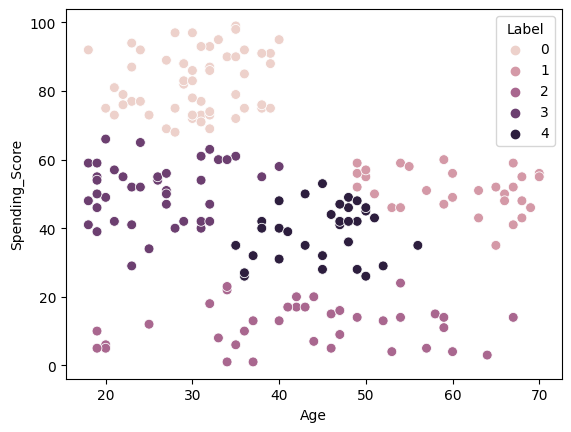

In [46]:
sns.scatterplot(x='Age',y='Spending_Score', data=Age_s, hue='Label', s=50)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0.5, 1.0, 'elbow method')

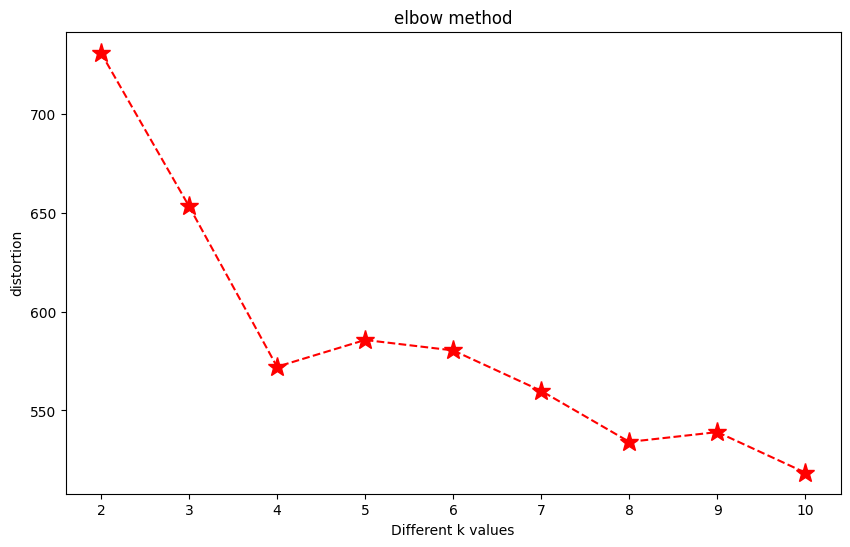

In [48]:
K =range(2, 11)
distortion = []
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(Age_s)
    distances = kmeanModel.transform(Age_s) # distances from each observation to each cluster centroid
    labels = kmeanModel.labels_
    result = []
    for i in range(k):
        cluster_distances = distances[labels == i, i] # distances from observations in each cluster to their own centroid
        result.append(np.mean(cluster_distances ** 2)) # calculate the mean of squared distances from observations in each cluster to their own centroid and add it to the result list
    distortion.append(sum(result)) # sum the means of all clusters and add it to the distortion list

plt.figure(figsize=(10,6))
plt.plot(K, distortion, "r*--", markersize=14.0)
plt.xlabel("Different k values")
plt.ylabel("distortion")
plt.title("elbow method")

In [52]:
from sklearn.metrics import silhouette_score

range_n_clusters = range(2, 11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(Age_s)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(Age_s, cluster_labels)
    print(
        f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}"
    )

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=2, the silhouette score is 0.468371535641407
For n_clusters=3, the silhouette score is 0.45275417800998324
For n_clusters=4, the silhouette score is 0.4998805697935935


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=5, the silhouette score is 0.44943216557294774
For n_clusters=6, the silhouette score is 0.4415259800490836
For n_clusters=7, the silhouette score is 0.40891368470522255


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=8, the silhouette score is 0.4308352898759221
For n_clusters=9, the silhouette score is 0.40902277601225234


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=10, the silhouette score is 0.422138701518482


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


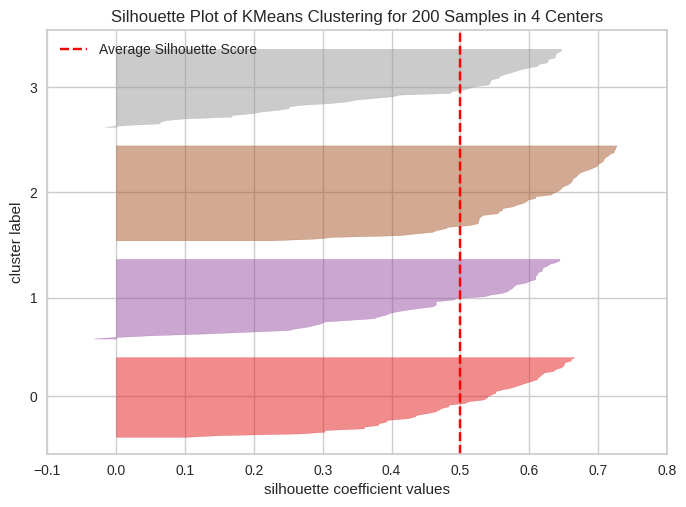

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 200 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [53]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(Age_s)  # Fit the data to the visualizer
visualizer.poof()

In [74]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit_predict(Age_s)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 3, 1, 2, 3, 2,
       1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 3,
       1, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [75]:
new_df = Age_s.copy()

In [76]:
new_df['cluster_Kmeans']= kmeans.fit_predict(Age_s)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [77]:
new_df

,Age,Spending_Score,Label,cluster_Kmeans
0,19,39,3,3
1,21,81,0,2
2,20,6,2,1
3,23,77,0,2
4,31,40,3,3
...,...,...,...,...
195,35,79,0,2
196,45,28,4,1
197,32,74,0,2
198,32,18,2,1


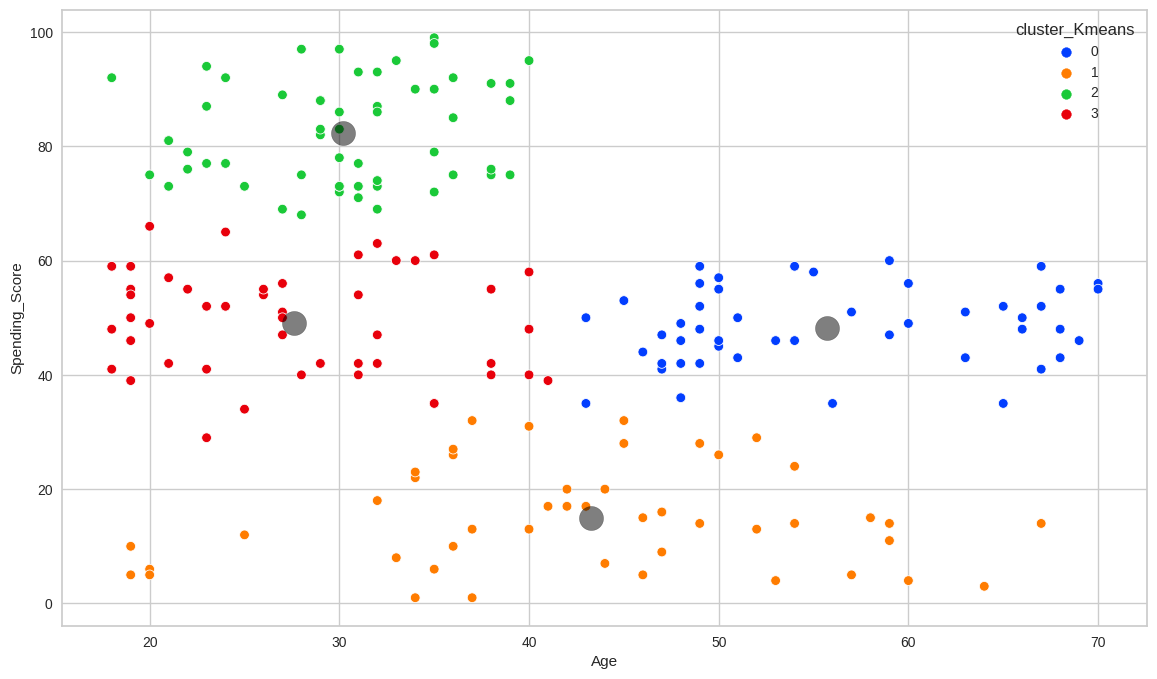

In [78]:
plt.figure(figsize=(14,8))
sns.scatterplot(x='Age',
                y='Spending_Score',
                hue='cluster_Kmeans',
                data=new_df,
                palette="bright")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0],
            centers[:, 1],
            c='black',
            s=300,
            alpha=0.5)
# We look at clusters and centroids formed by age and spending score.

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [79]:
Annual_S = df[['Annual_Income' , 'Spending_Score']]

#### *ii. Determine optimal number of clusters*

In [82]:
errors=[]
for i in range(1,11):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(Annual_S)
        errors.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

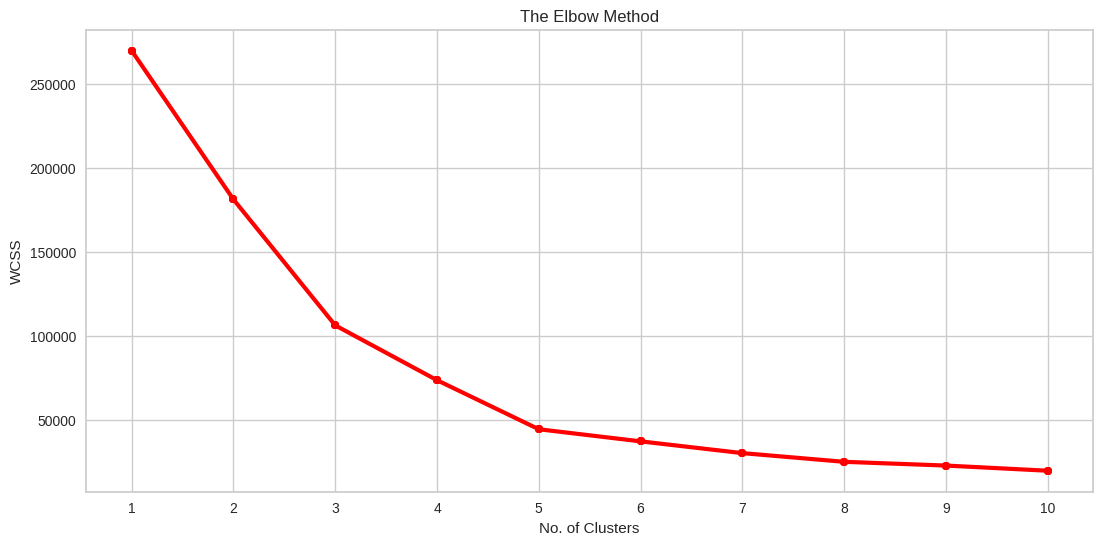

In [83]:
plt.figure(figsize=(13,6))
plt.plot(range(1,11),errors)
plt.plot(range(1,11), errors,linewidth=3, color='red', marker='8')
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,11,1))
plt.show()

#### *iii. Apply K Means*

In [85]:
km= KMeans(n_clusters=5)
km.fit(Annual_S)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [86]:
y=km.predict(Annual_S)
Annual_S['Label']=y
Annual_S.head()

<ipython-input-86-c92e81a1b685>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Annual_S['Label']=y


,Annual_Income,Spending_Score,Label
0,15,39,4
1,15,81,0
2,16,6,4
3,16,77,0
4,17,40,4


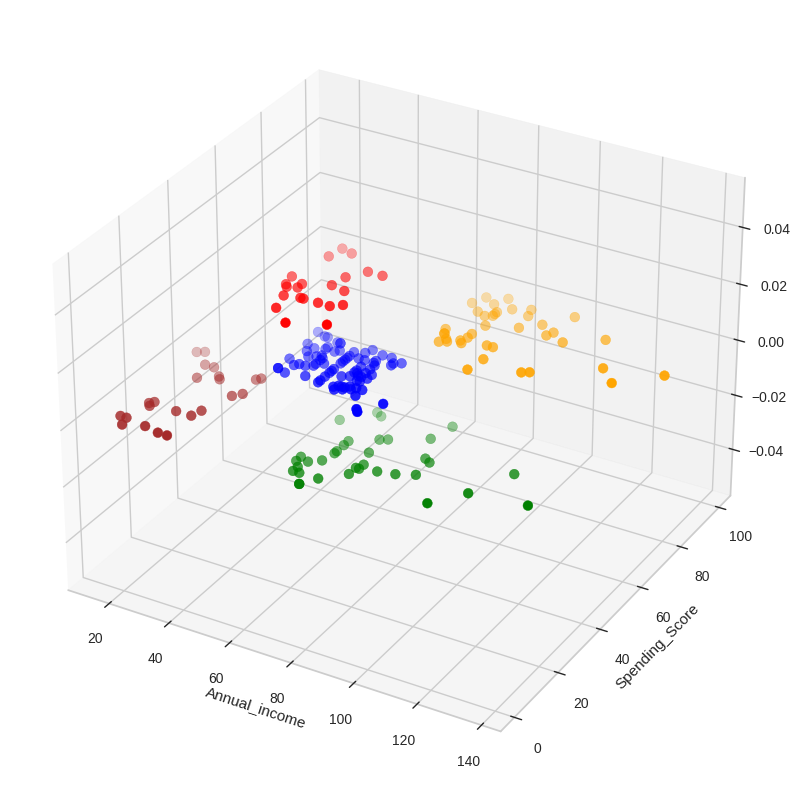

In [145]:
#3d scatterplot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig= plt.figure(figsize=(20,10))
ax=fig.add_subplot(111, projection='3d')
ax.scatter(Annual_S['Annual_Income'][Annual_S['Label']==0], Annual_S['Spending_Score'][Annual_S['Label']==0],c='red',s=50)
ax.scatter(Annual_S['Annual_Income'][Annual_S['Label']==1], Annual_S['Spending_Score'][Annual_S['Label']==1],c='blue',s=50)
ax.scatter(Annual_S['Annual_Income'][Annual_S['Label']==2], Annual_S['Spending_Score'][Annual_S['Label']==2],c='green',s=50)
ax.scatter(Annual_S['Annual_Income'][Annual_S['Label']==3], Annual_S['Spending_Score'][Annual_S['Label']==3],c='orange',s=50)
ax.scatter(Annual_S['Annual_Income'][Annual_S['Label']==4], Annual_S['Spending_Score'][Annual_S['Label']==4],c='brown',s=50)
ax.set_xlabel('Annual_income')
ax.set_ylabel('Spending_Score')
plt.show()

#### *iv. Visualizing and Labeling All the Clusters*

In [146]:
from sklearn.metrics import silhouette_score

range_n_clusters = range(2, 11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(Annual_S)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(Annual_S, cluster_labels)
    print(
        f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}"
    )

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

For n_clusters=2, the silhouette score is 0.29665583028100806
For n_clusters=3, the silhouette score is 0.46751886895309097
For n_clusters=4, the silhouette score is 0.49412960742198214
For n_clusters=5, the silhouette score is 0.5546324897868851
For n_clusters=6, the silhouette score is 0.5404494251008866
For n_clusters=7, the silhouette score is 0.5270185398620556
For n_clusters=8, the silhouette score is 0.45846187872060723
For n_clusters=9, the silhouette score is 0.4554151069984988


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=10, the silhouette score is 0.45964664952727297


In [147]:
Annual_S

,Annual_Income,Spending_Score,Label
0,15,39,4
1,15,81,0
2,16,6,4
3,16,77,0
4,17,40,4
...,...,...,...
195,120,79,3
196,126,28,2
197,126,74,3
198,137,18,2


<Axes: xlabel='Annual_Income', ylabel='Spending_Score'>

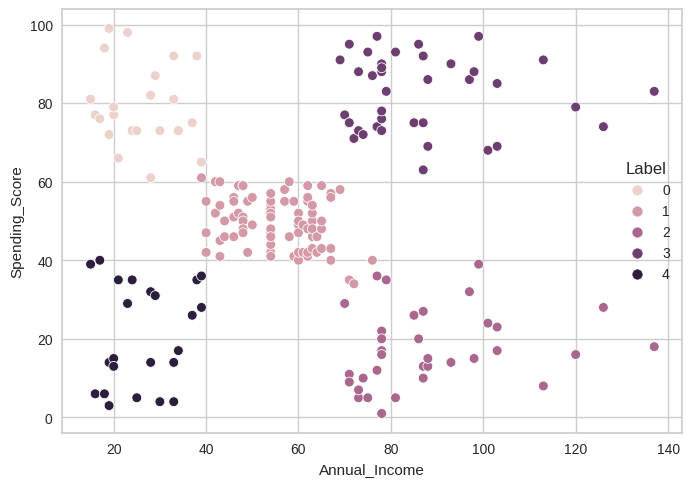

In [148]:
sns.scatterplot(x='Annual_Income',y='Spending_Score', data=Annual_S, hue='Label', s=50)

In [149]:
new_df2= Annual_S.copy()

In [150]:
new_df2['cluster_Agg']= km.fit_predict(Annual_S)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


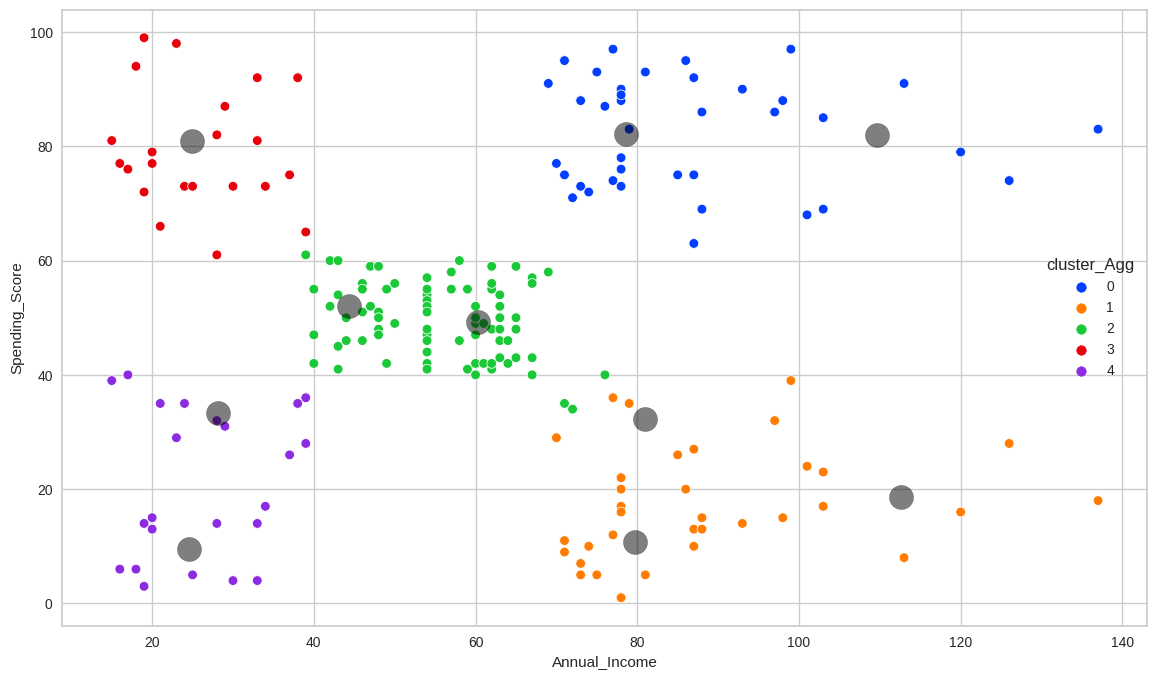

In [151]:
plt.figure(figsize=(14,8))
sns.scatterplot(x='Annual_Income',
                y='Spending_Score',
                hue='cluster_Agg',
                data=new_df2,
                palette="bright")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0],
            centers[:, 1],
            c='black',
            s=300,
            alpha=0.5)
# We look at clusters and centroids formed by age and spending score.

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

In [106]:
Age_s

,Age,Spending_Score,Label
0,19,39,3
1,21,81,0
2,20,6,2
3,23,77,0
4,31,40,3
...,...,...,...
195,35,79,0
196,45,28,4
197,32,74,0
198,32,18,2


In [107]:
from scipy.cluster.hierarchy import linkage

In [110]:
hc_ward = linkage(y = Age_s, method = "ward")
hc_complete = linkage(Age_s, "complete")
hc_average = linkage(Age_s, "average")
hc_single = linkage(Age_s, "single")

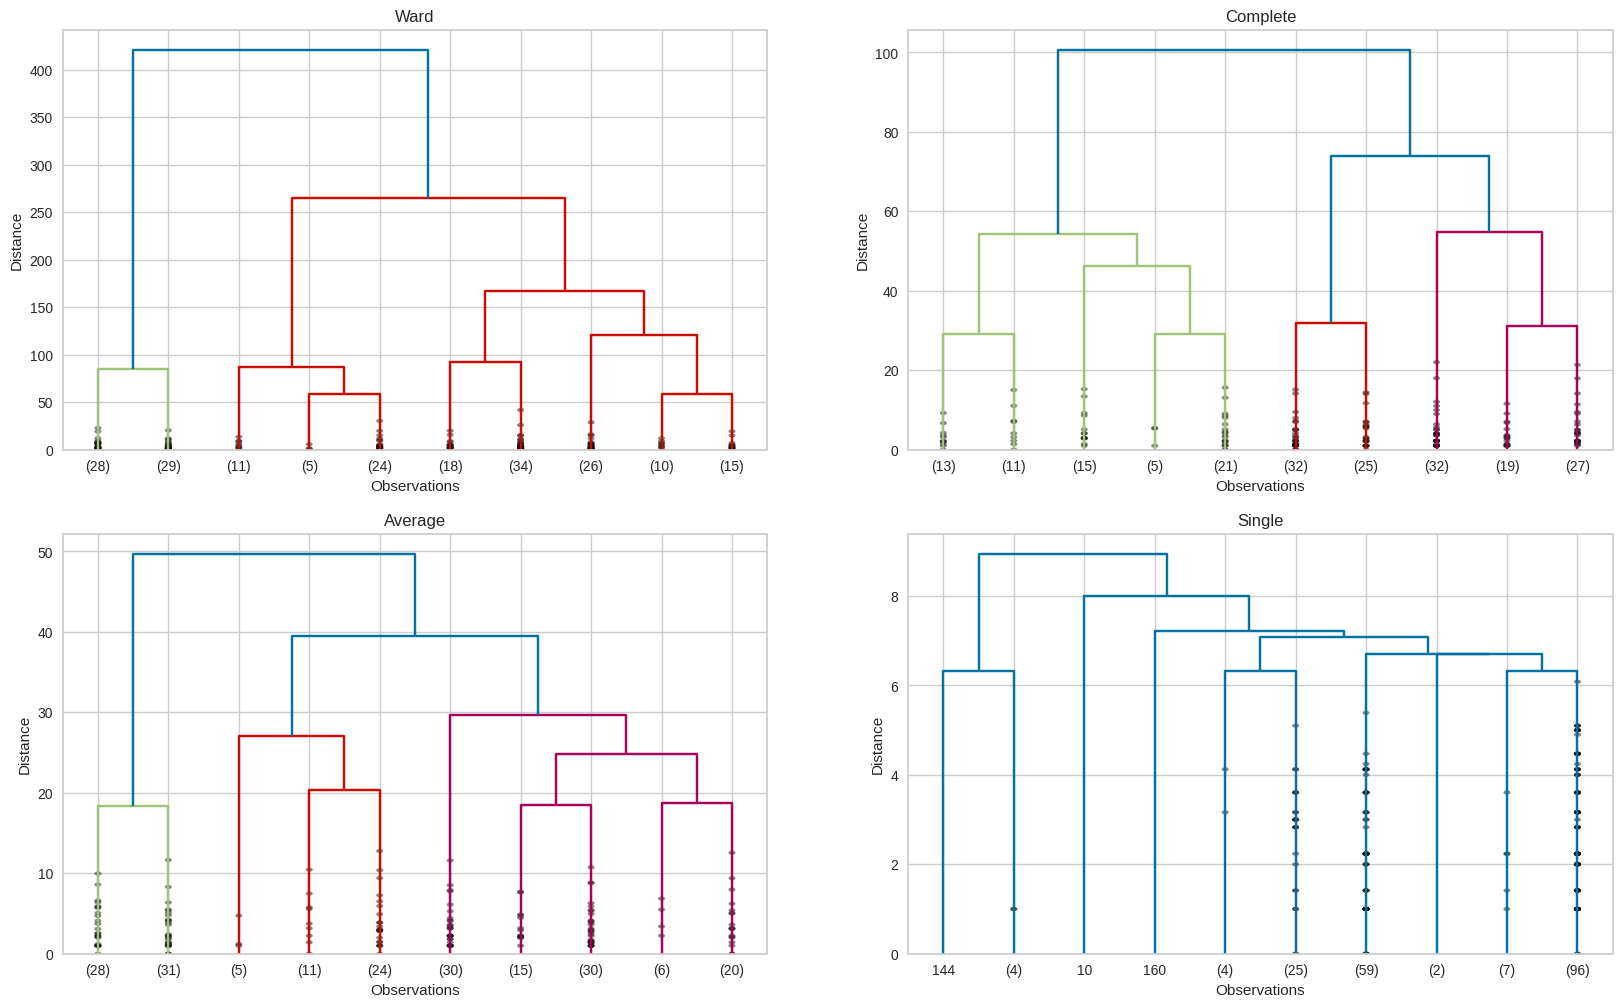

In [111]:
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

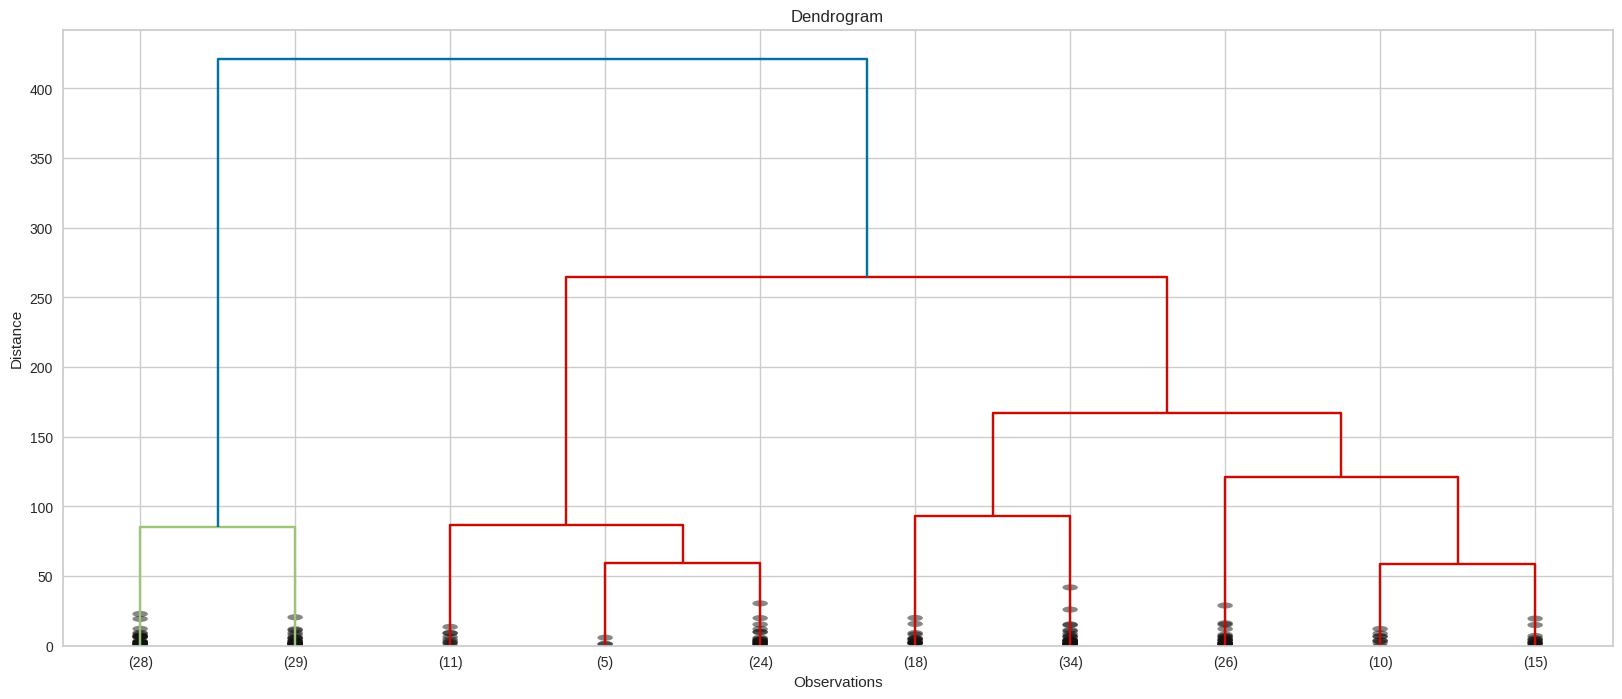

In [112]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

In [113]:
from sklearn.cluster import AgglomerativeClustering

In [114]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(Age_s)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(Age_s, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4556379778963705
For n_clusters=3, the silhouette score is 0.4417065492784383
For n_clusters=4, the silhouette score is 0.45562221182335
For n_clusters=5, the silhouette score is 0.40365885348002256
For n_clusters=6, the silhouette score is 0.4137075684953505
For n_clusters=7, the silhouette score is 0.4167602822700921
For n_clusters=8, the silhouette score is 0.3889407776384822
For n_clusters=9, the silhouette score is 0.39510578440891053
For n_clusters=10, the silhouette score is 0.39432440050785117


## Clustering based on Annual Income and Spending Score- x2

In [116]:
hc_ward = linkage(y =Annual_S, method = "ward")
hc_complete = linkage(Annual_S, "complete")
hc_average = linkage(Annual_S, "average")
hc_single = linkage(Annual_S, "single")

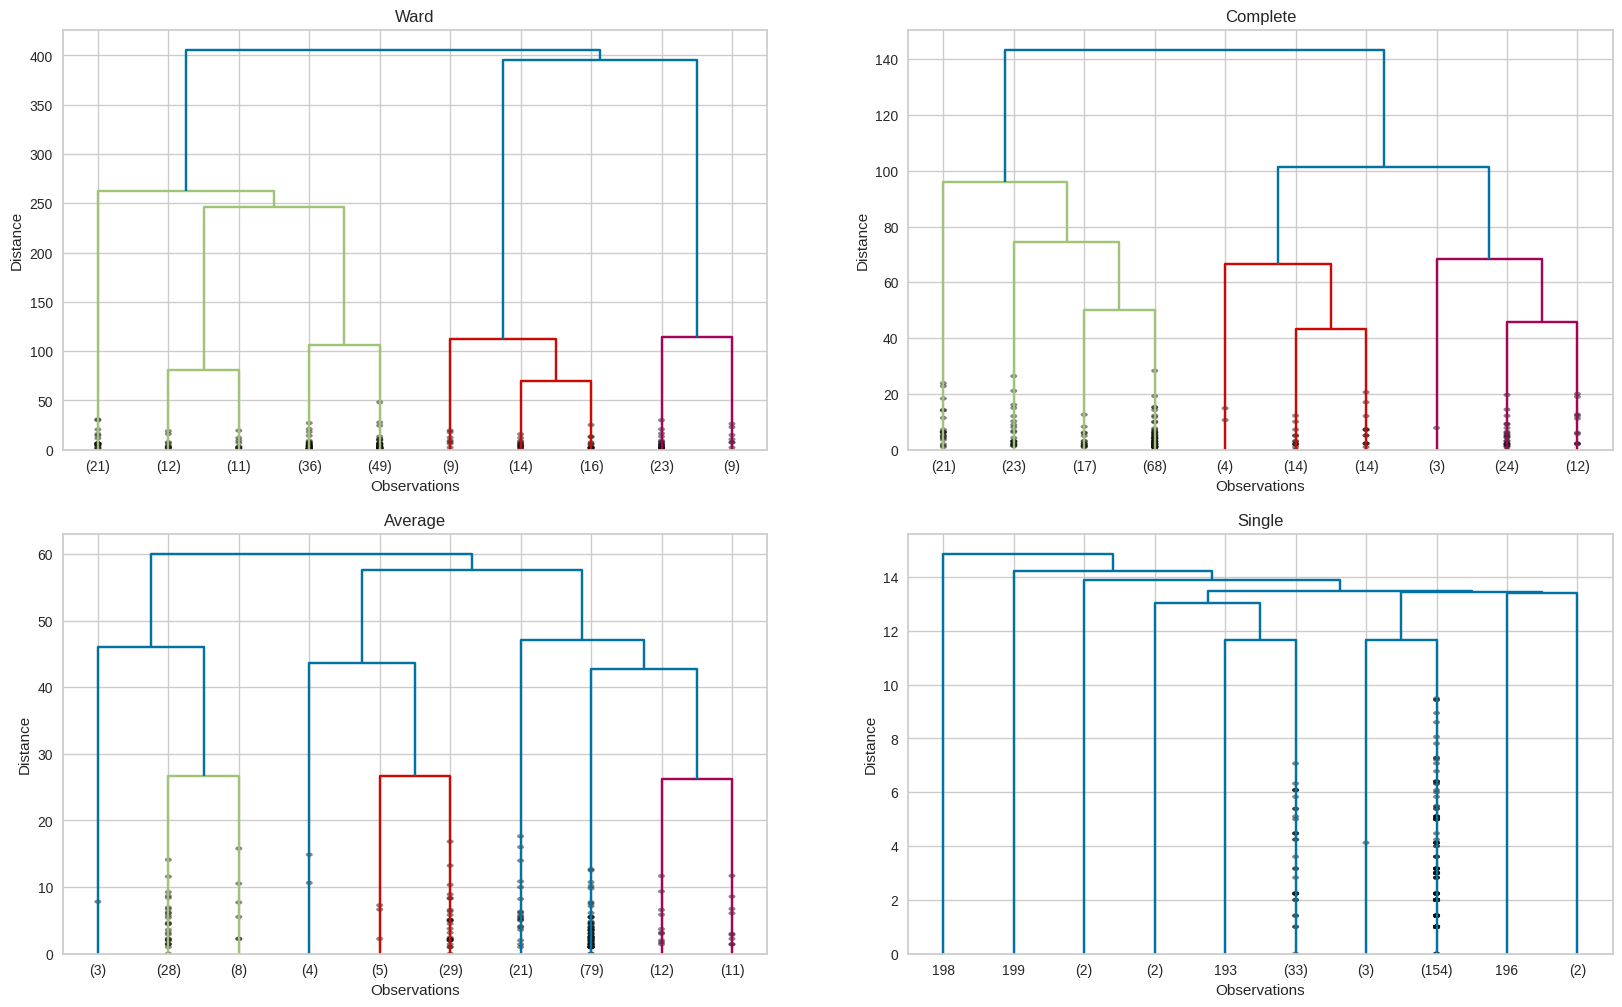

In [117]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

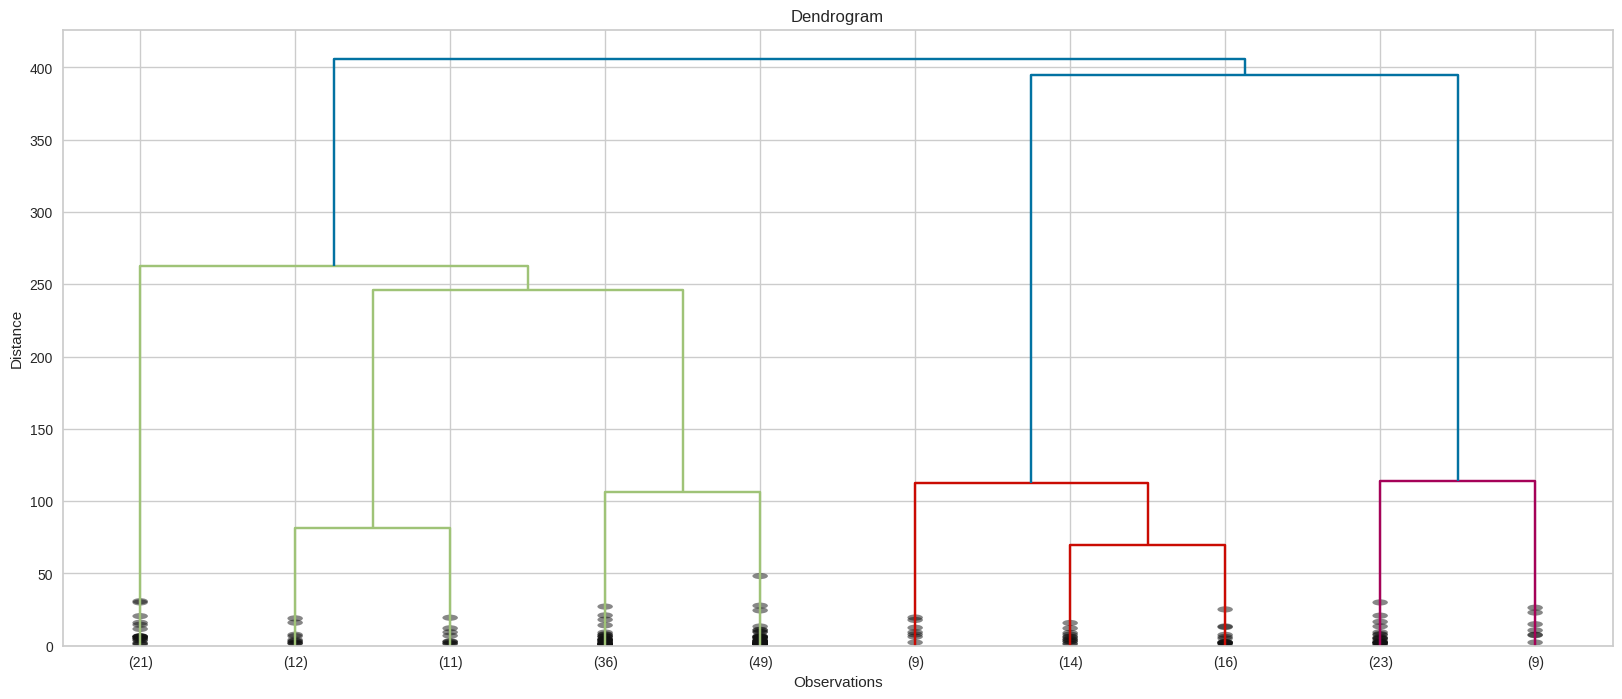

In [118]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

In [120]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(Annual_S)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(Annual_S, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.36700017862176
For n_clusters=3, the silhouette score is 0.4617804331839923
For n_clusters=4, the silhouette score is 0.491618605854862
For n_clusters=5, the silhouette score is 0.5536572113406742
For n_clusters=6, the silhouette score is 0.53864092060385
For n_clusters=7, the silhouette score is 0.5205137486970374
For n_clusters=8, the silhouette score is 0.43303817216230284
For n_clusters=9, the silhouette score is 0.43936003773362403
For n_clusters=10, the silhouette score is 0.434662815290919


### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

In [122]:
Age1 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y_age= Age1.fit_predict(Age_s)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [123]:
Age_s['cluster_Agg'] = y_age
Age_s.head()

<ipython-input-123-3e7577bcefbd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Age_s['cluster_Agg'] = y_age


,Age,Spending_Score,Label,cluster_Agg
0,19,39,3,0
1,21,81,0,3
2,20,6,2,2
3,23,77,0,3
4,31,40,3,0


#### Annual Income and Spending Score- x2

In [125]:
Ann1 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_ann1= Ann1.fit_predict(Annual_S)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


### iii. *Visualizing and Labeling All the Clusters*

#### Age and Spending Score- x1

<Axes: xlabel='Age', ylabel='Spending_Score'>

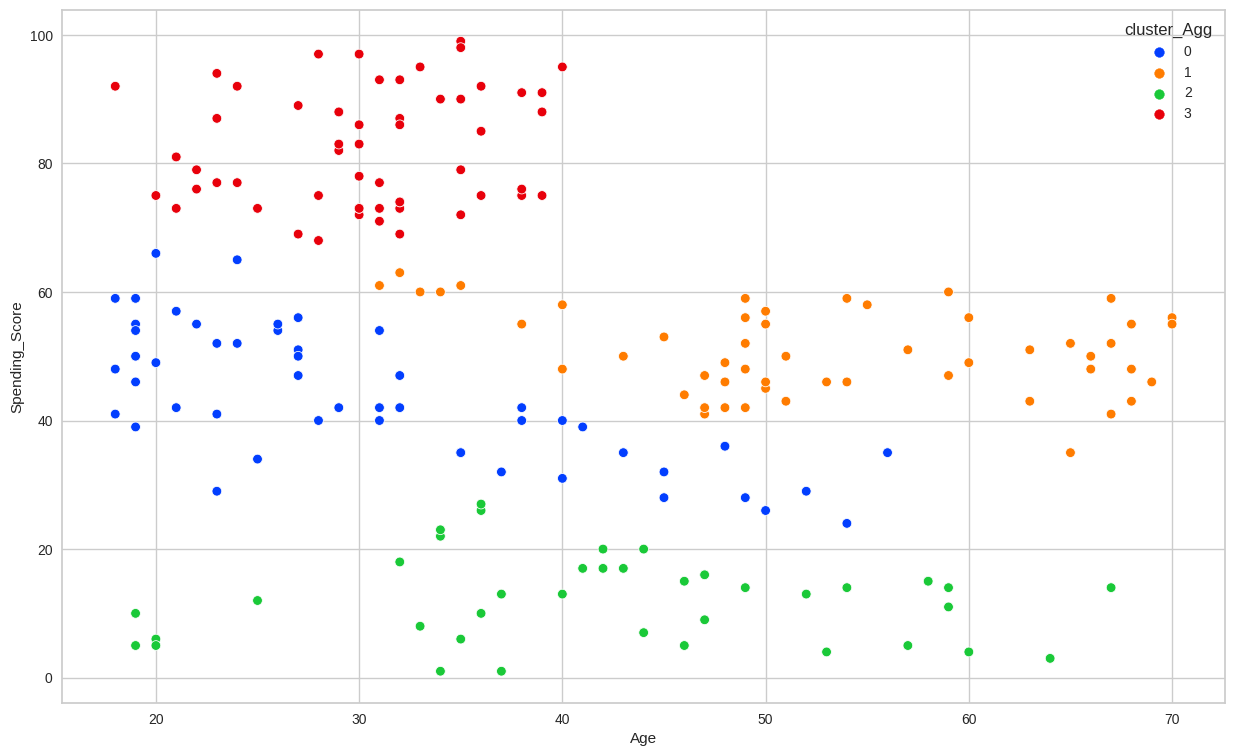

In [126]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='Age', y='Spending_Score', hue='cluster_Agg', data=Age_s, palette="bright")

#### Annual Income and Spending Score- x2

<ipython-input-135-3feb48be2246>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Annual_Income', y='Spending_Score', data=new_df2, palette=['green', 'orange',


Text(0.5, 1.0, 'Agg')

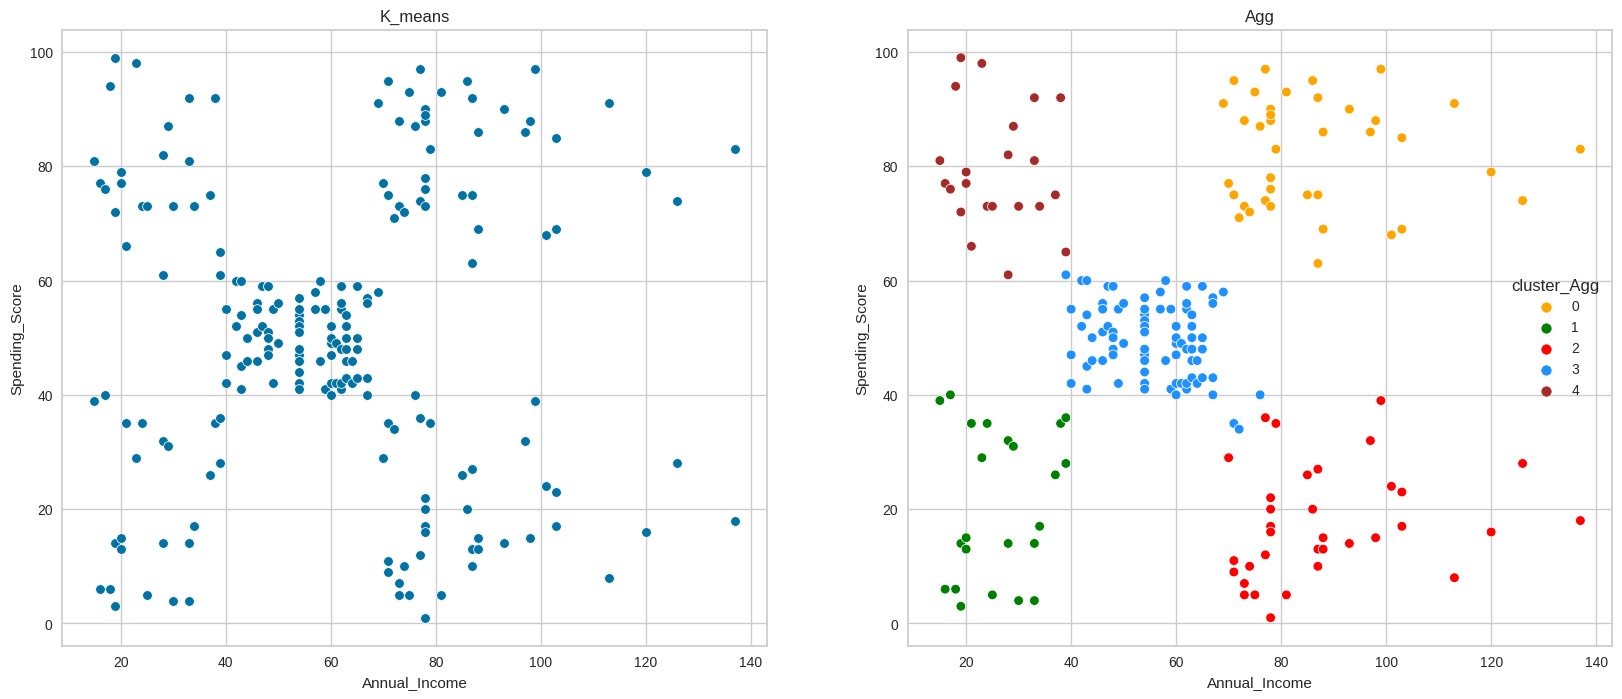

In [135]:
plt.figure(figsize = (20,8))

plt.subplot(121)
sns.scatterplot(x='Annual_Income', y='Spending_Score', data=new_df2, palette=['green', 'orange',
                                                            'brown','dodgerblue','red'])
plt.title("K_means")
plt.subplot(122)
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='cluster_Agg', data=new_df2, palette=['orange', 'green',
                                                            'red', 'dodgerblue', 'brown'])
plt.title("Agg")

<Axes: xlabel='Annual_Income', ylabel='Spending_Score'>

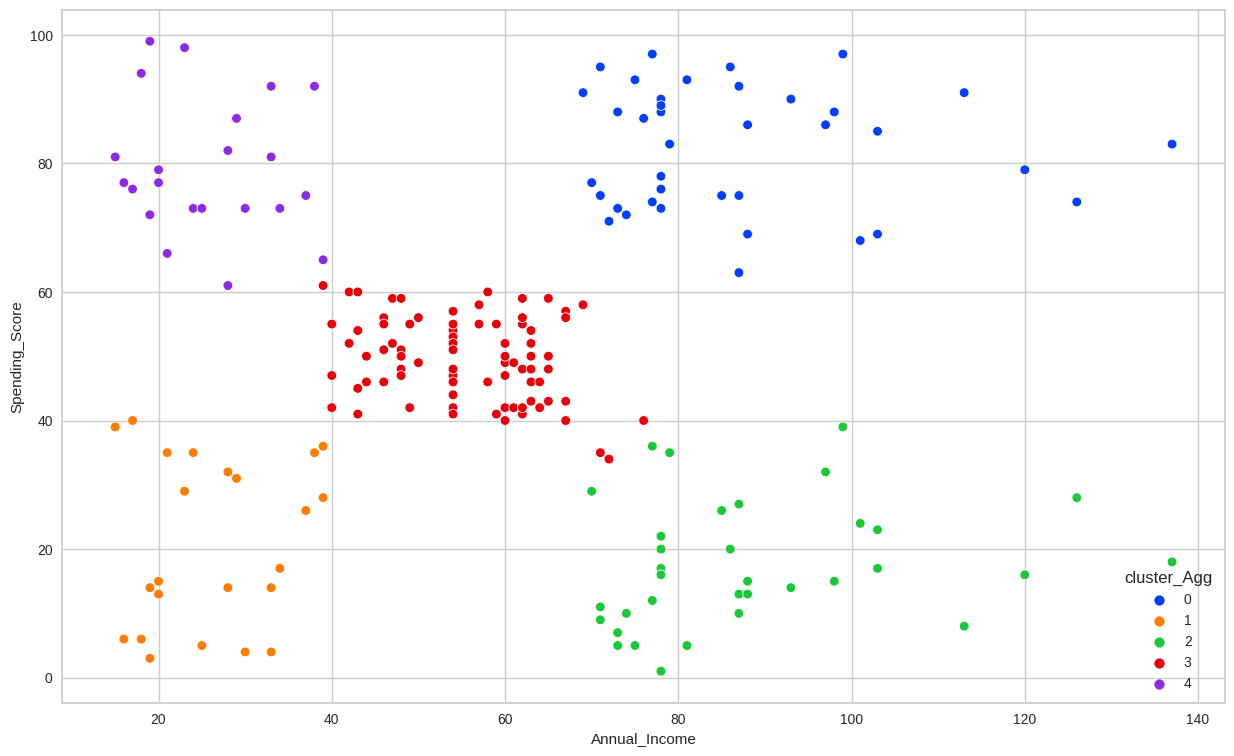

In [133]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='cluster_Agg', data=new_df2 ,palette="bright")

#### Interpretation based on Age and Spending Score- x1

In [136]:
Age_s.head()

,Age,Spending_Score,Label,cluster_Agg
0,19,39,3,0
1,21,81,0,3
2,20,6,2,2
3,23,77,0,3
4,31,40,3,0


In [137]:
Age_s.value_counts()

Age  Spending_Score  Label  cluster_Agg
47   16              2      2              2
48   36              4      0              2
21   81              0      3              2
58   15              2      2              2
35   35              4      0              2
                                          ..
32   18              2      2              1
     42              3      0              1
     47              3      0              1
     63              3      1              1
70   56              1      1              1
Length: 192, dtype: int64

In [163]:
Age_s['cluster_Kmeans'] = kmeans.fit_predict(Age_s)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[Text(0, 0, '36'),
 Text(0, 0, '28'),
 Text(0, 0, '27'),
 Text(0, 0, '23'),
 Text(0, 0, '20'),
 Text(0, 0, '17'),
 Text(0, 0, '15'),
 Text(0, 0, '14'),
 Text(0, 0, '11'),
 Text(0, 0, '9')]

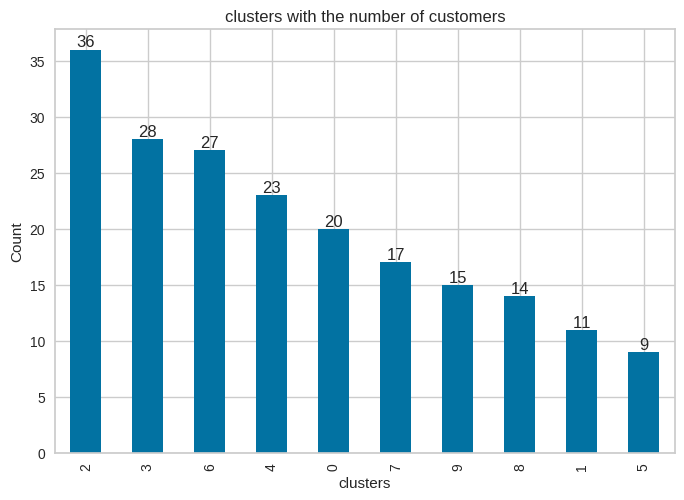

In [165]:
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = Age_s.cluster_Kmeans.value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0])

In [167]:
df["cluster_Age_Spending_Score"] = Age_s.cluster_Kmeans
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score,cluster_Age_Spending_Score
0,1,1,19,15,39,4
1,2,1,21,15,81,2
2,3,0,20,16,6,5
3,4,0,23,16,77,2
4,5,0,31,17,40,9


In [172]:
df.drop(["CustomerID"] , axis = 1)

,Gender,Age,Annual_Income,Spending_Score,cluster_Age_Spending_Score
0,1,19,15,39,4
1,1,21,15,81,2
2,0,20,16,6,5
3,0,23,16,77,2
4,0,31,17,40,9
...,...,...,...,...,...
195,0,35,120,79,2
196,0,45,126,28,1
197,1,32,126,74,2
198,1,32,137,18,7


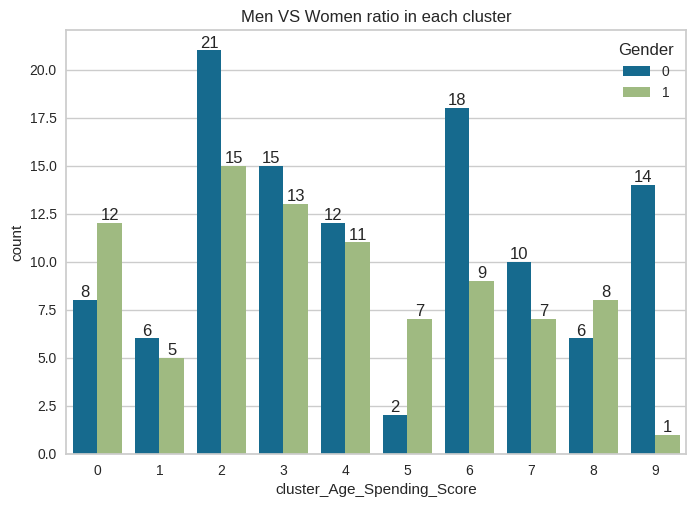

In [173]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax = sns.countplot(x=df.cluster_Age_Spending_Score, hue=df.Gender)
for p in ax.containers:
    ax.bar_label(p)

In [174]:
df.groupby("cluster_Age_Spending_Score").mean()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
cluster_Age_Spending_Score,,,,,
0,80.750000,0.600000,64.850000,53.150000,49.850000
1,104.272727,0.454545,48.181818,63.363636,30.909091
2,94.472222,0.416667,29.250000,57.111111,72.194444
3,128.928571,0.464286,31.285714,72.285714,90.392857
4,85.260870,0.478261,22.304348,54.565217,50.695652
5,122.333333,0.777778,26.888889,67.555556,6.000000
6,84.333333,0.333333,48.148148,54.703704,49.518519
7,145.470588,0.411765,40.058824,81.411765,17.470588
8,79.428571,0.571429,55.928571,49.500000,10.000000


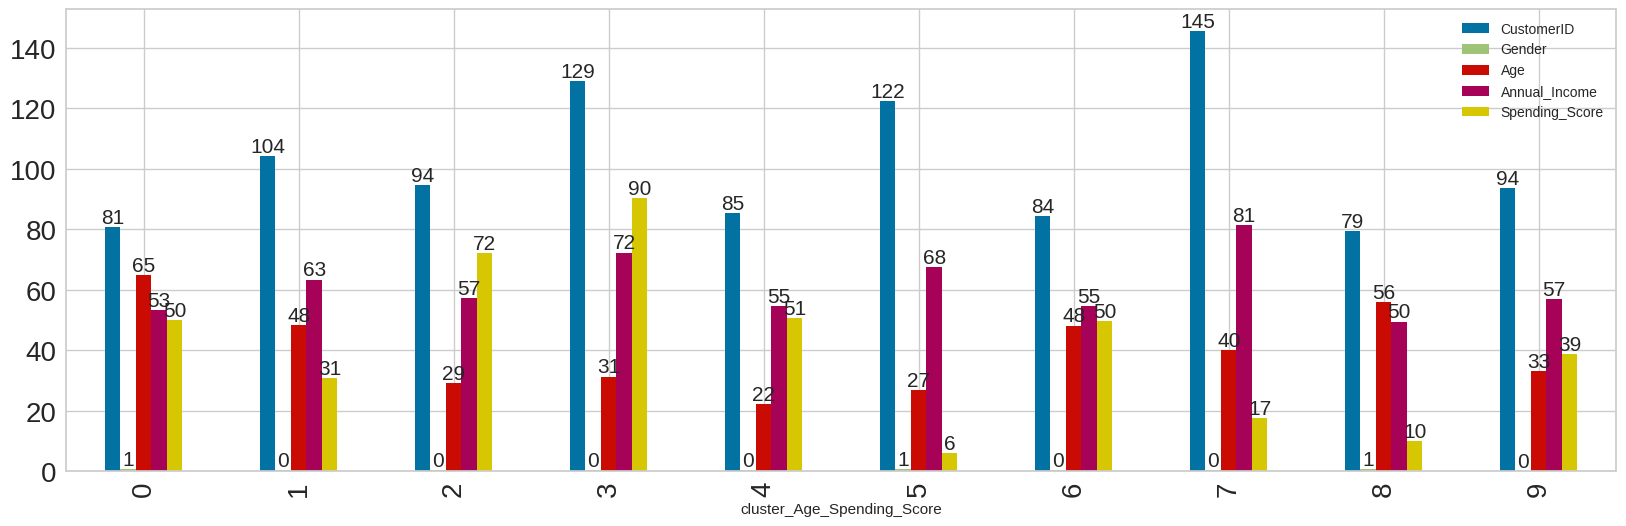

In [175]:
ax = df.groupby("cluster_Age_Spending_Score").mean().plot(kind='bar',
                                                          figsize=(20, 6),
                                                          fontsize=20)
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=15)


### Conclusion

**cluster 0** : The average age is around 55, both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 45, the annula_income is high but the spending_scores are very low.
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high.
This group consists of our loyal customers. Our company derives the main profit from this group. Very
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 25.both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- x2

In [138]:
Annual_S.head()

,Annual_Income,Spending_Score,Label
0,15,39,4
1,15,81,0
2,16,6,4
3,16,77,0
4,17,40,4


In [178]:
Annual_S.value_counts()

Annual_Income  Spending_Score  Label
78             1               2        2
40             42              1        2
71             75              3        2
48             59              1        2
15             39              4        1
                                       ..
49             55              1        1
50             49              1        1
               56              1        1
54             41              1        1
137            83              3        1
Length: 196, dtype: int64

In [179]:
Annual_S['cluster_Kmeans'] = kmeans.fit_predict(Annual_S)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-179-d6f51e5f67c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Annual_S['cluster_Kmeans'] = kmeans.fit_predict(Annual_S)


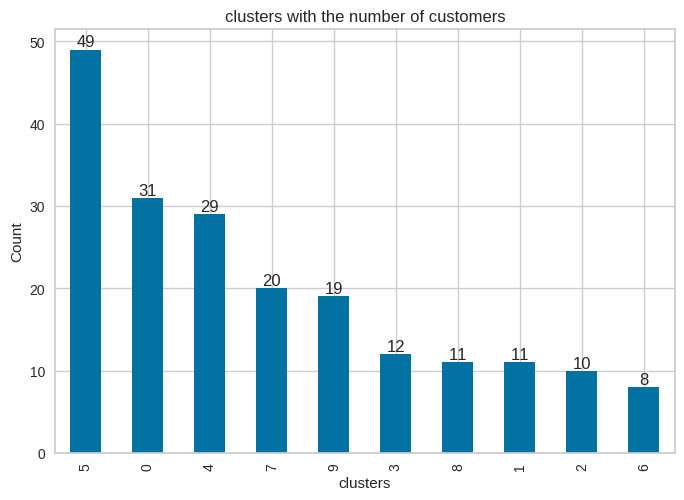

In [180]:
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = Annual_S.cluster_Kmeans.value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0]);

In [182]:
df.drop(columns="cluster_Age_Spending_Score", inplace=True)

In [184]:
df["cluster_Annual_Income_Spending_Score"] = Annual_S.cluster_Kmeans
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score,cluster_Annual_Income_Spending_Score
0,1,1,19,15,39,8
1,2,1,21,15,81,7
2,3,0,20,16,6,3
3,4,0,23,16,77,7
4,5,0,31,17,40,8


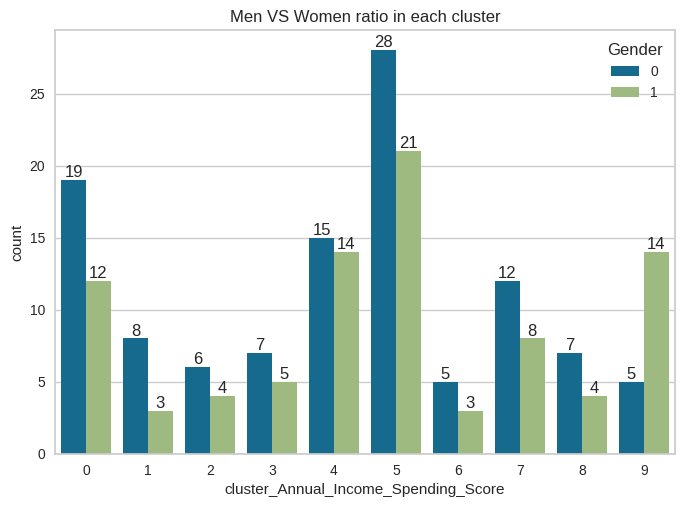

In [185]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax =sns.countplot(x=df.cluster_Annual_Income_Spending_Score, hue=df.Gender)
for p in ax.containers:
    ax.bar_label(p)

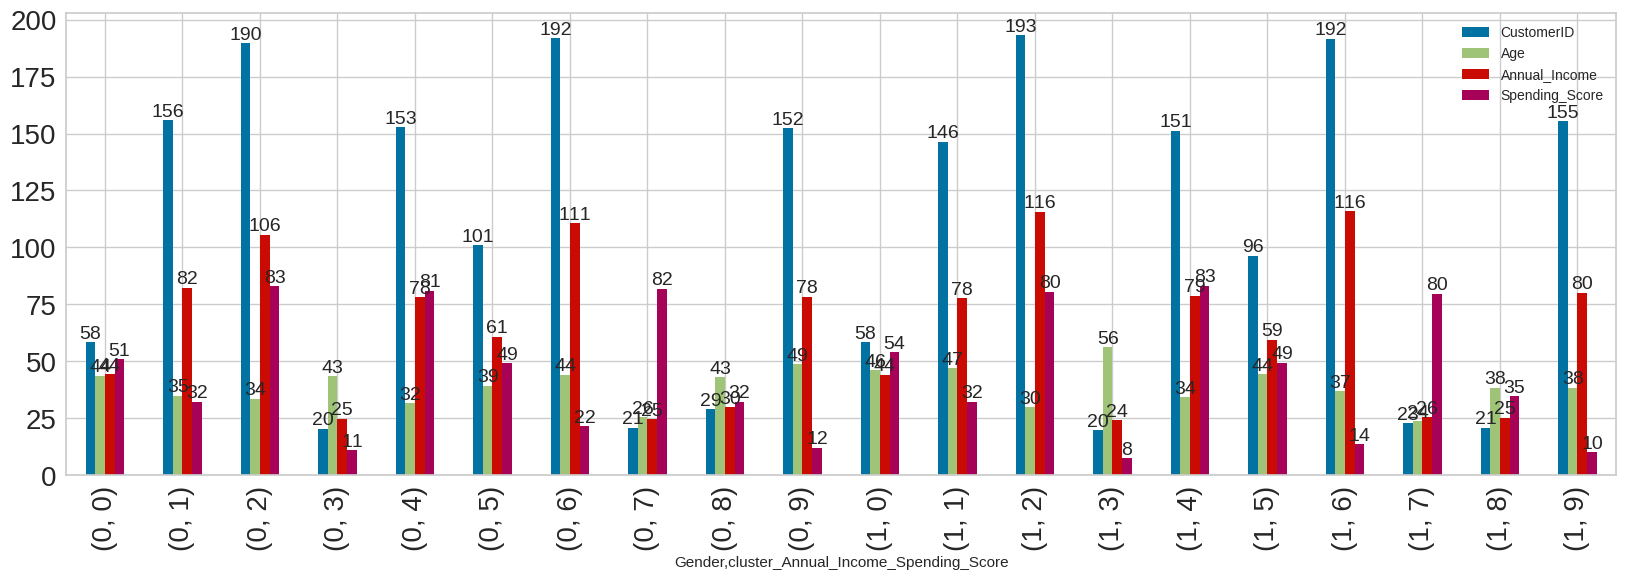

In [186]:
ax = df.groupby(["Gender", "cluster_Annual_Income_Spending_Score"]).mean().plot(kind="bar",
                                                                                figsize=(20,6),
                                                                                fontsize=20)
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=14)

## Conclusion

### Female

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 45, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group.
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 50. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group.
Very special promotions can be made in order not to miss it.

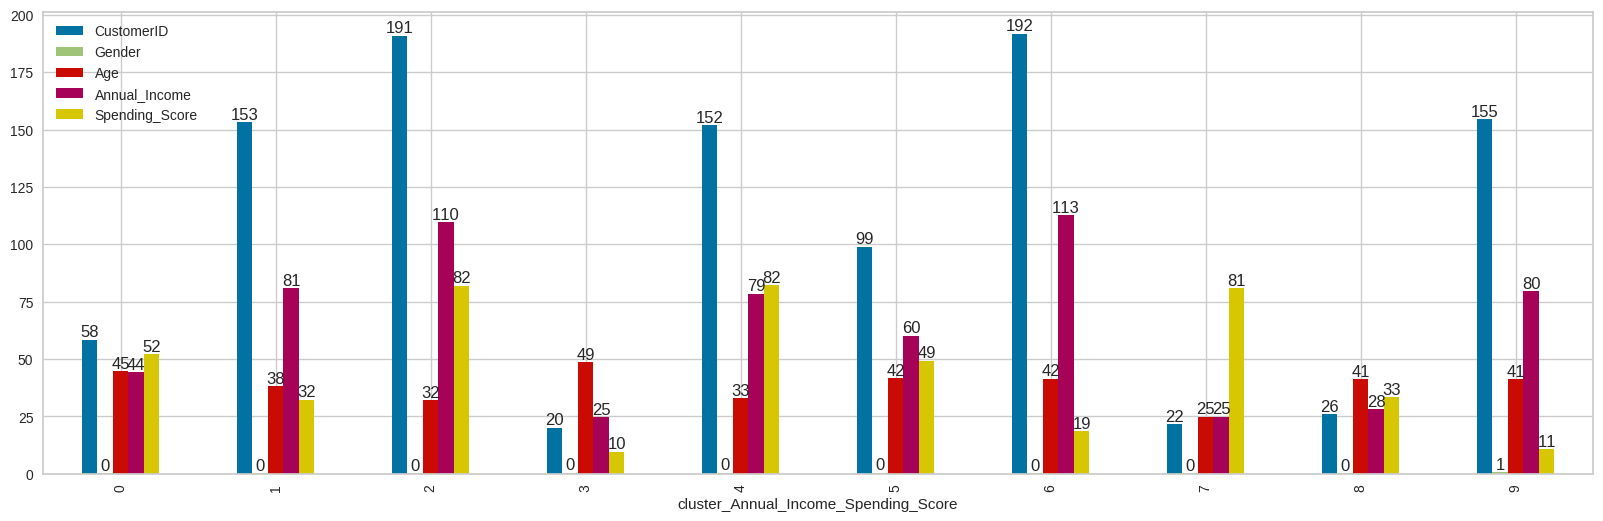

In [187]:
ax = df.groupby("cluster_Annual_Income_Spending_Score").mean().plot(kind='bar', figsize = (20,6))
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f")

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 30, both annula_income and spending_scores are very high.
This group consists of our loyal customers. Our company derives the main profit from this group. Very
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this
group.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___